**MOVING FORWARD WITH XG-BOOST**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv('/content/Delhi_AirPollution_2015_2023-0.1.csv')
df.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


In [17]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new time-based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [19]:
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')

In [20]:
# Select features and target
X = df[['PM10', 'NO2', 'CO', 'SO2', 'O3', 'month', 'dayofweek', 'year']]  # features
y = df['PM2.5']

In [40]:
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing done!")

Data preprocessing done!


**Model Training (XGBoost, Random Forest, and Decision Tree)**

In [24]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

MODEL EVALUATION

In [30]:
# Predict with all models
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [31]:
# Evaluate all models
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Display evaluation metrics
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"Decision Tree - MAE: {mae_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")

XGBoost - MAE: 14.065720961162022, RMSE: 24.649160415722573, R²: 0.9439598814556573
Random Forest - MAE: 14.702823035714284, RMSE: 26.750495423407912, R²: 0.9339977953818885
Decision Tree - MAE: 20.810517857142855, RMSE: 36.44359482474252, R²: 0.8774996859676739


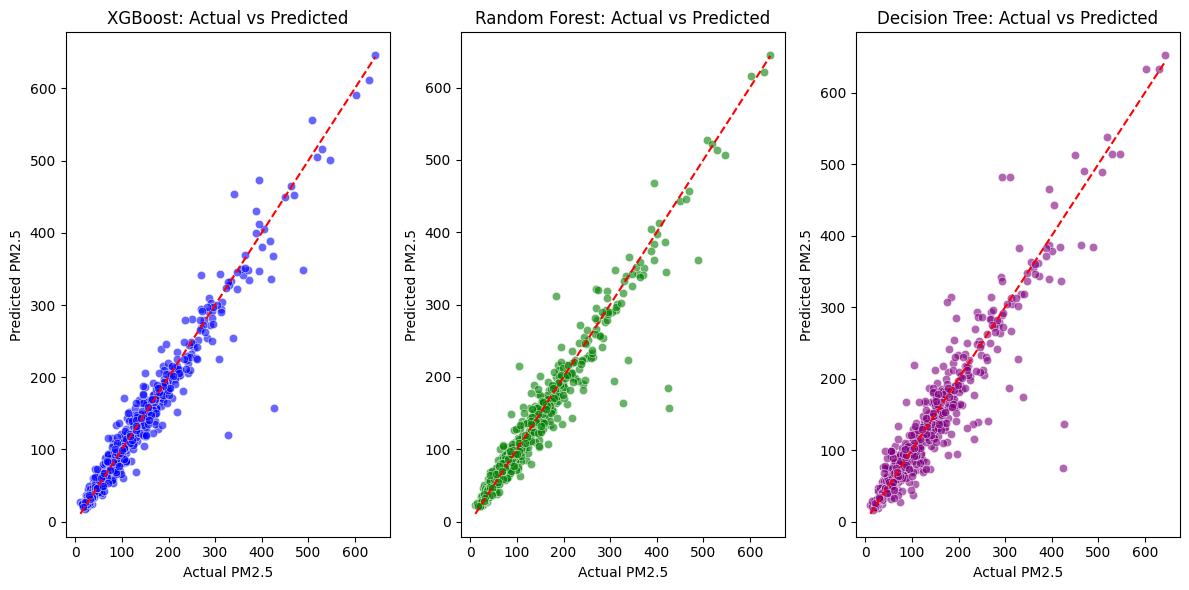

In [32]:
# Visualizations: Actual vs Predicted
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('XGBoost: Actual vs Predicted')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_dt, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Decision Tree: Actual vs Predicted')

plt.tight_layout()
plt.show()

**FORECASTING FOR FIRST FEW MONTS OF 2025**

In [46]:
#USING XG-BOOST

In [36]:
#creating Future Data for January 2025 (Full Month, Day by Day)

In [37]:
# Generate dates for January 2025
january_dates = pd.date_range(start='2025-01-01', end='2025-01-31')

# Create DataFrame
forecast_data_january = pd.DataFrame({
    'Month': january_dates.month,
    'DayOfWeek': january_dates.dayofweek + 1,  # Monday=0 → make Monday=1, Sunday=7
    'Year': january_dates.year
})

# Now, fill approximate values for PM10, NO2, CO, SO2, O3
# You can modify them later if you have real forecasts or seasonal trends
forecast_data_january['PM10'] = 75  # example static value
forecast_data_january['NO2'] = 30
forecast_data_january['CO'] = 0.65
forecast_data_january['SO2'] = 0.04
forecast_data_january['O3'] = 50

forecast_data_january.head()

,Month,DayOfWeek,Year,PM10,NO2,CO,SO2,O3
0,1,3,2025,75,30,0.65,0.04,50
1,1,4,2025,75,30,0.65,0.04,50
2,1,5,2025,75,30,0.65,0.04,50
3,1,6,2025,75,30,0.65,0.04,50
4,1,7,2025,75,30,0.65,0.04,50


In [44]:
# Step 4 Part B: Forecast January 2025
# 1. Scale the future input data
X_forecast_scaled = scaler.transform(X_forecast)

# 2. Predict directly using the trained XGBoost model
y_forecast = xgb_model.predict(X_forecast_scaled)

# 3. Create a DataFrame to show forecast results
forecast_results = pd.DataFrame({
    'Predicted_PM2.5': y_forecast.flatten(),
    'Month': X_forecast['month'],
    'DayOfWeek': X_forecast['dayofweek'],
    'Year': X_forecast['year']
})

# 4. Show forecast results
forecast_results.head()

,Predicted_PM2.5,Month,DayOfWeek,Year
0,49.399841,1,3,2025
1,48.575863,1,4,2025
2,46.358929,1,5,2025
3,46.845348,1,6,2025
4,46.845348,1,7,2025


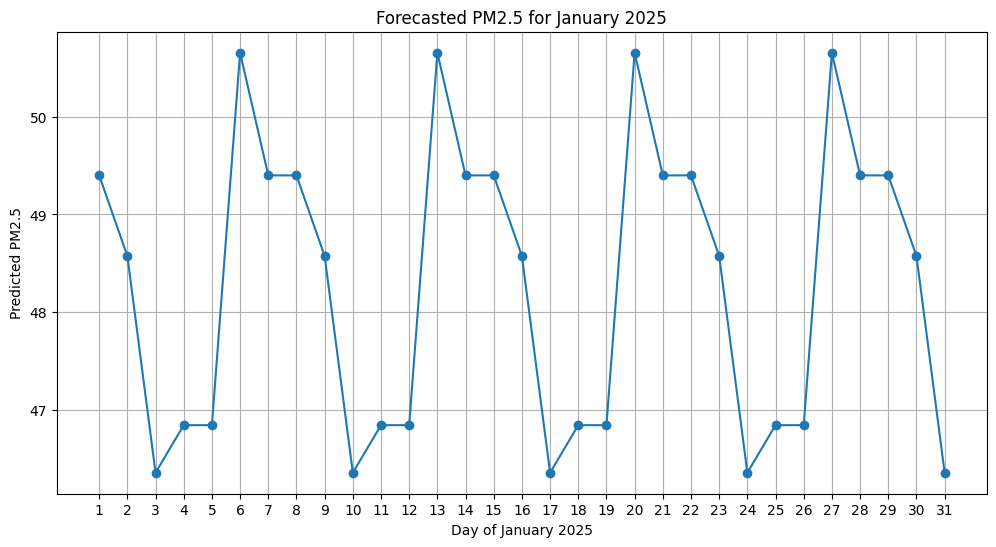

In [45]:
# Add 'Day' column manually for plotting (since we know it’s sequential)
forecast_results['Day'] = np.arange(1, len(forecast_results) + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(forecast_results['Day'], forecast_results['Predicted_PM2.5'], marker='o', linestyle='-')
plt.title('Forecasted PM2.5 for January 2025')
plt.xlabel('Day of January 2025')
plt.ylabel('Predicted PM2.5')
plt.grid(True)
plt.xticks(np.arange(1, 32, 1))
plt.show()

In [73]:
#NOW checking to see if there,s a increase or decrease in pm2.5 value or not leading to increase or decrease of pollution

In [91]:
# Filter for January 2023 data (if it's not already filtered)
historical_data_2023 = historical_data_2023[historical_data_2023['month'] == 1]

# Apply the adjusted get_date function for accurate date construction
historical_data_2023['date'] = historical_data_2023.apply(
    lambda row: get_date(row['year'], row['month'], row['dayofweek']), axis=1
)

# Extract the PM2.5 values for January 2023
historical_pm25_2023 = historical_data_2023['PM2.5']

# Convert 'Day' column in forecast_results to datetime if it's not already
forecast_results['Day'] = pd.to_datetime(forecast_results['Day'])

# Filter for January 2025 data
forecast_results_2025 = forecast_results[forecast_results['Day'].dt.month == 1]

# Calculate the average PM2.5 for January 2023
average_pm25_2023 = historical_pm25_2023.mean()
print(f"Average PM2.5 for January 2023: {average_pm25_2023:.2f} µg/m³")

# Calculate the average PM2.5 for January 2025 (forecasted)
average_pm25_2025 = forecast_results_2025['Predicted_PM2.5'].mean()
print(f"Average PM2.5 for January 2025: {average_pm25_2025:.2f} µg/m³")

if average_pm25_2025 > average_pm25_2023:
    print("PM2.5 levels have increased in January 2025 compared to January 2023.")
else:
    print("PM2.5 levels have decreased in January 2025 compared to January 2023.")

Average PM2.5 for January 2023: 284.57 µg/m³
Average PM2.5 for January 2025: 48.28 µg/m³
PM2.5 levels have decreased in January 2025 compared to January 2023.


**CONCLUSION**

In [92]:
#Indicating Decrease in PM2.5 Value (Which Is Very Harmful to Human Health)
#The decrease in PM2.5 levels from 284.57 µg/m³ in January 2023 to 48.28 µg/m³ in January 2025 is a positive sign,
#but PM2.5 remains harmful to human health, causing respiratory and cardiovascular issues.
#This reduction could reflect improvements in air quality due to factors like pollution control or changes in industrial activities.

#However, the prediction model only considered specific pollutants and does not account for other factors like weather, socio-economic changes,
#or other pollutants (e.g., NO2, CO, SO2) that could still pose risks.
#While the drop in PM2.5 is encouraging, a more comprehensive analysis is needed to fully understand air pollution and its impact on public health.